In [1]:
# Step 1. Ecnoding in utfa, must change to latin 1 to read
# Ste 2. Encoding produces colulms that are garbage, so we ony select first 2
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# Quick count per category (label)
# value_coutnts(normalize=True) gives you a %, who knew?

labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


________________________

Clean the text (see [data prep lesson](https://ds.codeup.com/nlp/prepare/#removing-accented-characters)) and create 3 sets of words: 

- The words that appear in legitimate text messages.
- The words that appear in spam text messages.
- All of the words.

In [6]:
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd

def basic_clean(text):
    text = unicodedata.normalize('NFKD', text.lower())\
        .encode('ascii', 'ignore')\
        .decode('utf-8', 'ignore')  
    return re.sub(r"[^a-z0-9'\s]", '', text)

In [7]:
# ascii to reduce noise
# decode using utf-8

In [8]:
df['text_cleaned'] = df.text.apply(basic_clean)
df.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...


In [9]:
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str=True)
    
    return string

In [10]:
df['text_tokenized'] = df.text_cleaned.apply(tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...


In [11]:
def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

In [12]:
df['text_lemmatized'] = df.text_tokenized.apply(lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...


In [13]:
def remove_stopwords(string, extra_words=[], exclude_words=[]):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove additional exclude_words.
    stopword_list.extend(exclude_words)
    
    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Add additional extra_words.
    filtered_words.extend(extra_words)
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

In [14]:
df['text_filtered'] =df.text_lemmatized.apply(remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though


`Add a column with list of words`

In [15]:
# need to remove single letter words, some punctuation
re.sub(r'([^a-z0-9\s]|\s.\s)', '', df.text_filtered[0])

'go jurong point crazy available bugisgreat world labuffet cine got amore wat'

In [16]:
# Make list comprehension
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
words

# words column,list of words found in each row
df = pd.concat([df, pd.DataFrame({'words': words})], axis =1)
df.words

0       [go, jurong, point, crazy, available, bugisgre...
1                               [ok, lar, joking, wifoni]
2       [free, entrywkly, comp, win, fa, cup, final, t...
3                [u, dun, say, early, horc, already, say]
4               [nahthink, go, usf, life, around, though]
                              ...                        
5567    [2nd, time, triedcontactu, a750, pound, prizec...
5568                      [b, going, esplanade, fr, home]
5569                  [pity, wa, mood, soany, suggestion]
5570    [guy, bitching, acted, likeinterested, buying,...
5571                                   [rofl, true, name]
Name: words, Length: 5572, dtype: object

In [17]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]"


***
**Exploring all words together, not by document**

`look for noise in data`
1. common words that your missing from stopwords
2. common words that are spelled differently across documents
   - Ex. Texas,Tx,tx,texas
3. words that are more common on spam than ham, or vice versa

***
**Exploring documents**

1. exploring n-grams, phrases
   - bi-gram (2 word phrase)
   - tri-gram (3 word phrase)
   - etc
***

## Finalize Prep:

1. Add feature that is the lenght of each document

2. Build a set of ham_words and spam_words to explore

In [27]:
# ham_words
ham_words =' '.join(df[df.label == 'ham'].text_filtered)
# spam words
spam_words =' '.join(df[df.label == 'spam'].text_filtered)
# all words
all_words = ' '.join(df.text_filtered)


ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)
spam_words

"free entrywkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcapply 08452810075over18freemsg hey darling3 weekword backlike fun still tb ok xxx std chgs send a150 rcv winner valued network customer selected receivea a900 prize reward claim call 09061701461 claim code kl341 valid 12 hour mobile 11 monthr entitled update latest colour mobile camera free call mobile update co free 08002986030 six chance win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply hlinfo urgentweek free membership a100000 prize jackpot txt word claim 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt message click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl englandmacedonia dont miss goalsteam news txt ur national team 87077 eg england 87077 trywales scotland 4txti14120 poboxox36504w45wq 16 thanks subscription ringtone uk mobile charged a5month please confirm replying yes reply charge

Once we have a list of words, we can transform it into a pandas `Series`, which we can then use to show us how often each of the words occurs.

In [28]:
# Sorts in decending order by value count, default to top 5

ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

spam_freq.head()

call    342
free    189
txt     140
text    128
ur      125
dtype: int64

Now we'll combine these three together to get one resulting data frame that we can work with:

In [34]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis =1, sort =True)
               .set_axis(['all', 'ham', 'spam'], axis = 1, inplace = False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )
word_counts.head()

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


We can now use this data set to answer some interesting questions:

- Are there words that should be added to the stopword list? 
- Are there words that are significantly more likely to occur in spam than in ham? 

In [35]:
# Top 10 most frequently occuring words
word_counts.sort_values(by='all', ascending =False).head(10)

,all,ham,spam
call,499,158,342
ur,340,217,125
get,328,255,72
ltgt,241,241,0
go,232,204,27
free,230,40,189
day,218,196,20
wa,217,207,9
ok,214,208,5
good,213,201,12


In [38]:
# Top 5 ham words that do not occur in spam
word_counts[word_counts.spam ==0].sort_values(by='ham').tail(5)

,all,ham,spam
say,86,86,0
later,114,112,0
da,112,112,0
lor,120,120,0
ltgt,241,241,0


In [39]:
# Top 5 spam words that do not occur in ham
word_counts[word_counts.ham ==0].sort_values(by='spam').tail(5)

,all,ham,spam
guaranteed,50,0,50
tone,60,0,60
nokia,62,0,62
prize,80,0,80
claim,96,0,96


### Document Word Count

The length of documents is often a good feature. 

In [40]:
df.words.head(1)

0    [go, jurong, point, crazy, available, bugisgre...
Name: words, dtype: object

In [42]:
len(df.words[0])

12

In [44]:
# add new feature of total word count
df['doc_lenght'] = [len(wordlist) for wordlist in df.words]

In [45]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_lenght
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",20
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]",6


In [46]:
# are there any doclenghts that are zero?
df[df.doc_lenght ==0]

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_lenght
959,ham,Where @,where,where,where,,[],0
2805,ham,Can a not?,can a not,can a not,can a not,,[],0
3374,ham,:),,,,,[],0
4573,ham,:( but your not here....,but your not here,but your not here,but your not here,,[],0
4822,ham,:-) :-),,,,,[],0


In [47]:
# Quickly remove from df
df = df[df.doc_lenght !=0]

## Visualize

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Word Counts: Visualize the % of term in ham vs. Spam
word_counts.assign(p_spam = word_counts.spam/word_counts['all'],
                   p_ham = word_counts.ham/word_counts['all'])

,all,ham,spam,p_spam,p_ham
008704050406,2,0,2,1.0,0.0
0089my,1,0,1,1.0,0.0
0121,1,0,1,1.0,0.0
01223585236,1,0,1,1.0,0.0
01223585334,2,0,2,1.0,0.0
...,...,...,...,...,...
zoe,2,1,1,0.5,0.5
zogtorius,1,1,0,0.0,1.0
zoom,1,1,0,0.0,1.0
zouk,1,0,1,1.0,0.0


Text(0.5, 1.0, 'proportion of spam vs. ham for the 20 most common words')

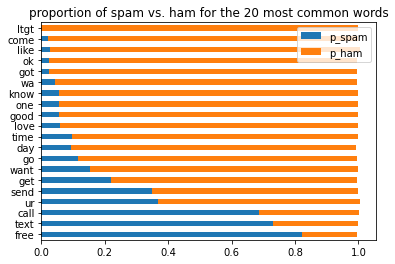

In [64]:
(word_counts.assign(p_spam = word_counts.spam/word_counts['all'],
                   p_ham = word_counts.ham/word_counts['all'])
 .sort_values(by='all')[['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked =True)
 )

plt.title("proportion of spam vs. ham for the 20 most common words")

`Words that unique to spam will be good features for modeling`
1. Free
2. Text
3. Call

### Word Clouds

```
python -m pip install --upgrade wordcloud
```

The wordcloud allows you to identify the relative frequency of different keywords using an easily digestible visual.

#### Common Use Cases

As a visualization technique, this method gives a more qualitative analysis of the topics in the documents.
 
#### Pros

1. It’s intuitive and easy to comprehend.
2. It helps identify overall respondent sentiment and the specific factors that drive it.
3. It provides direction for further analysis.

#### Cons

1. It fails to measure each word’s value in and of itself.
2. It allows irrelevant words to appear.
3. When words appear similar in size, it becomes difficult to differentiate them.

First we'll take a look at a simple example:

In [65]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

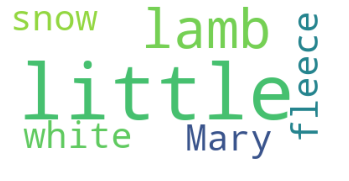

In [66]:
sentence = 'Mary had a little lamb, little lamb, little, lamb. Its fleece was white as snow'
img = WordCloud(background_color='white').generate(sentence)
plt.imshow(img)

plt.axis('off')

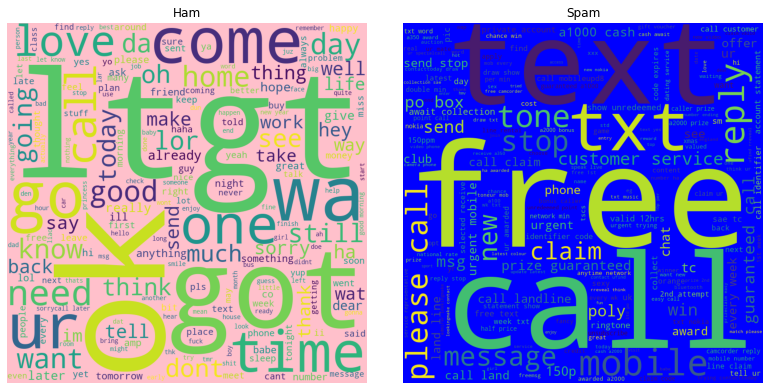

In [71]:
# ham_word_cloud
ham_cloud = WordCloud(background_color = 'pink', height = 800, width = 800).generate(ham_words)
spam_cloud = WordCloud(background_color = 'blue', height = 800, width = 800).generate(spam_words)
plt.figure(figsize = (10,10))
axs = [plt.axes([.25, 1,.5,.5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')


## Bigrams

Bigrams are a specific instance of the broader concept of n-grams, which is a way to combine words together. This lets us measure not just the individual word frequency, but also takes into account which words appear together.

To produce the bigrams, we'll use `nltk`.

In [73]:
sentence
bigrams = nltk.ngrams(sentence.split(), 2) # n =2
list(bigrams)

[('Mary', 'had'),
 ('had', 'a'),
 ('a', 'little'),
 ('little', 'lamb,'),
 ('lamb,', 'little'),
 ('little', 'lamb,'),
 ('lamb,', 'little,'),
 ('little,', 'lamb.'),
 ('lamb.', 'Its'),
 ('Its', 'fleece'),
 ('fleece', 'was'),
 ('was', 'white'),
 ('white', 'as'),
 ('as', 'snow')]

We can apply the same transformation to our ham data set in order to find out which bigrams are the most frequently occuring.

In [82]:
ham_bigrams = pd.Series(nltk.ngrams(ham_words.split(), 2)).value_counts().head(20)
spam_bigrams = pd.Series(nltk.ngrams(spam_words.split(), 2)).value_counts().head(20)

spam_bigrams

(please, call)          43
(customer, service)     27
(po, box)               23
(guaranteed, call)      23
(prize, guaranteed)     22
(a1000, cash)           20
(send, stop)            19
(every, week)           19
(await, collection)     18
(urgent, mobile)        18
(land, line)            18
(valid, 12hrs)          17
(claim, call)           16
(sae, tc)               16
(account, statement)    16
(selected, receive)     15
(call, 08000930705)     15
(call, customer)        15
(identifier, code)      15
(call, mobileupd8)      15
dtype: int64

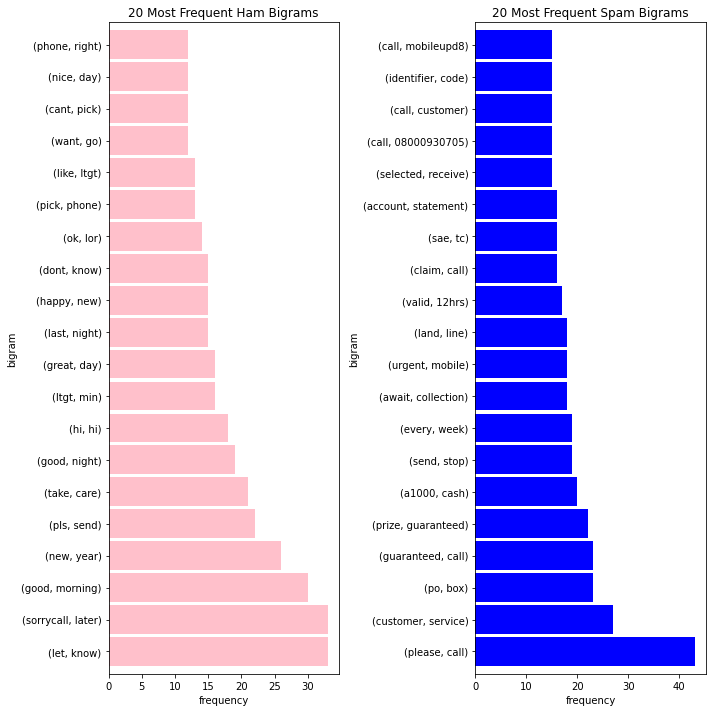

In [91]:
plt.subplot(1,2,1)

ham_bigrams.plot.barh(color = 'pink', width = .9, figsize = (10,10))
plt.title('20 Most Frequent Ham Bigrams')
plt.ylabel('bigram')
plt.xlabel('frequency')

plt.subplot(1,2,2)
spam_bigrams.plot.barh(color = 'blue', width = .9, figsize = (10,10))
plt.title('20 Most Frequent Spam Bigrams')
plt.ylabel('bigram')
plt.xlabel('frequency')
plt.tight_layout()
plt.show()

We can use these bigrams to make a word cloud as well, with a little more effort.

In [ ]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.



## Exercises

Do your work for this exercise in a file named `explore`.

1. Spam Data

    1. Load the spam data set.
    1. Create and explore bigrams for the spam data. Visualize them with a word
       cloud. How do they compare with the ham bigrams?
    1. Is there any overlap in the bigrams for the spam data and the ham data?
    1. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both
       the spam and ham data.

1. Explore the blog articles using the techniques discussed in the exploration
   lesson.

1. Explore the news articles using the techniques discussed in the exploration
   lesson. Use the `category` variable when exploring.


## Feature Extraction

1. Word count: how many words appear in each document
2. Term Frequency (TF): How often a word appears in a document.
3. Inverse Document Frequency (IDF): How much information a word provides, based on how commonly a word appears across multiple documents. The more frequently a word appears, the lower the IDF for that word will be. $$
\mbox{idf}(\mbox{word})
=
\log\left(\frac{\mbox{# of documents}}{\mbox{# of documents containing the word}}\right)
$$

4. Term Frequency - Inverse Document Frequency (TF-IDF): The multiplication of the two measures above. A word that has a high frequency in a document will have a high TF. If it appears in many other documents, than the information the word provides, or uniqueness of that word, is lowered. This is done mathematically by multiplying by the IDF, which will approach 0 and the number of documents with the word increases. 

### Term Frequency

Term frequency describes how frequently a word appears **in a document**. It can be calculated in a number of ways:

- **Raw Count**: The count of the number of occurences of each word **in the document**.

- **Frequency**: The number of times each word appears divided by the total number of words **in the document**.
    
- **Augmented Frequency**: The frequency of each word divided by the maximum frequency **in the document**. This can help prevent bias towards larger documents.